<a href="https://colab.research.google.com/github/Yooru6/Keras-MNIST-FMNIST/blob/master/DENSE_FMNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Mnist - Dense
-With fully dense NN

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Dataset
- loading dataset
- making list of labels
-plotting couple of images from dataset
- training-, validation- and testing dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [0]:
#labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

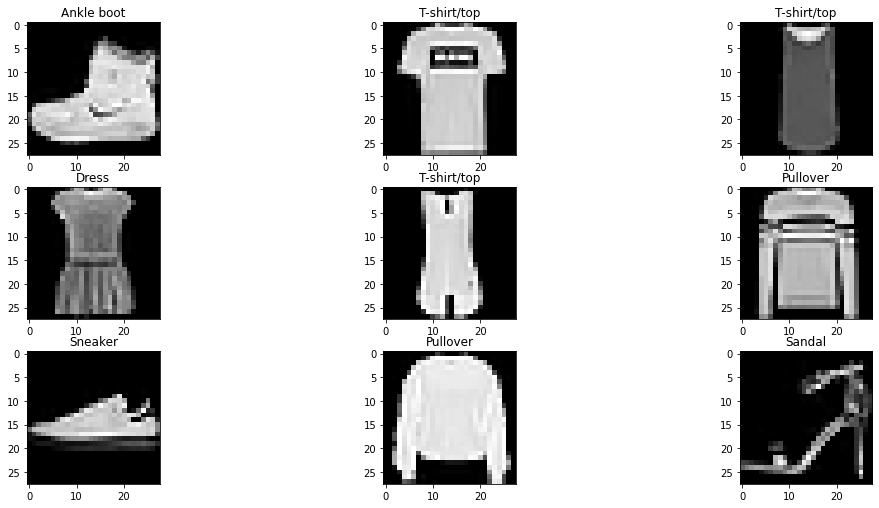

In [0]:
# Plot example images from x_data
fig, ax = plt.subplots(3, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i in range(8):
    ax[i].imshow(train_data[i],cmap='gray')
    ax[i].set_title(class_names[train_labels[i]],fontsize=12)
    ax[i+1].imshow(train_data[i+1],cmap='gray')
    ax[i+1].set_title(class_names[train_labels[i+1]],fontsize=12)
    i=i+1

In [0]:
#Training & Test set

#60 000 samples
x_train = train_data / 255.0

# 8000 samples
x_test = test_data[:8000] / 255.0
y_test = test_labels[:8000]

# 2000 samples
x_val=test_data[8000:] / 255.0
y_val=test_labels[8000:]

x_train.shape

(60000, 28, 28)

## MODEL
- Creating model
- Compiling model

In [0]:
model = keras.Sequential()
#28x28 to single array -> 784

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10))


In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_46 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_47 (Dropout)         (None, 32)              

## Train
- training model with training data(60 000 samples) and validating with validation data(8000 samples)

- 20 epochs

In [0]:
history=model.fit(x_train, train_labels,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6757 - accuracy: 0.7620 - val_loss: 0.4653 - val_accuracy: 0.8275
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4752 - accuracy: 0.8336 - val_loss: 0.4042 - val_accuracy: 0.8460
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4337 - accuracy: 0.8483 - val_loss: 0.3820 - val_accuracy: 0.8590
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8566 - val_loss: 0.3863 - val_accuracy: 0.8620
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3902 - accuracy: 0.8626 - val_loss: 0.4010 - val_accuracy: 0.8510
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8669 - val_loss: 0.3464 - val_accuracy: 0.8720
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8699 - val_loss: 0.3673 - val_accuracy:

## Evaluate
- Evaluating model with separate testing data(2000 samples)
- Plotting accuracy and loss graph

In [0]:
# Test model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

250/250 - 0s - loss: 0.3380 - accuracy: 0.8826

Test accuracy: 0.8826249837875366


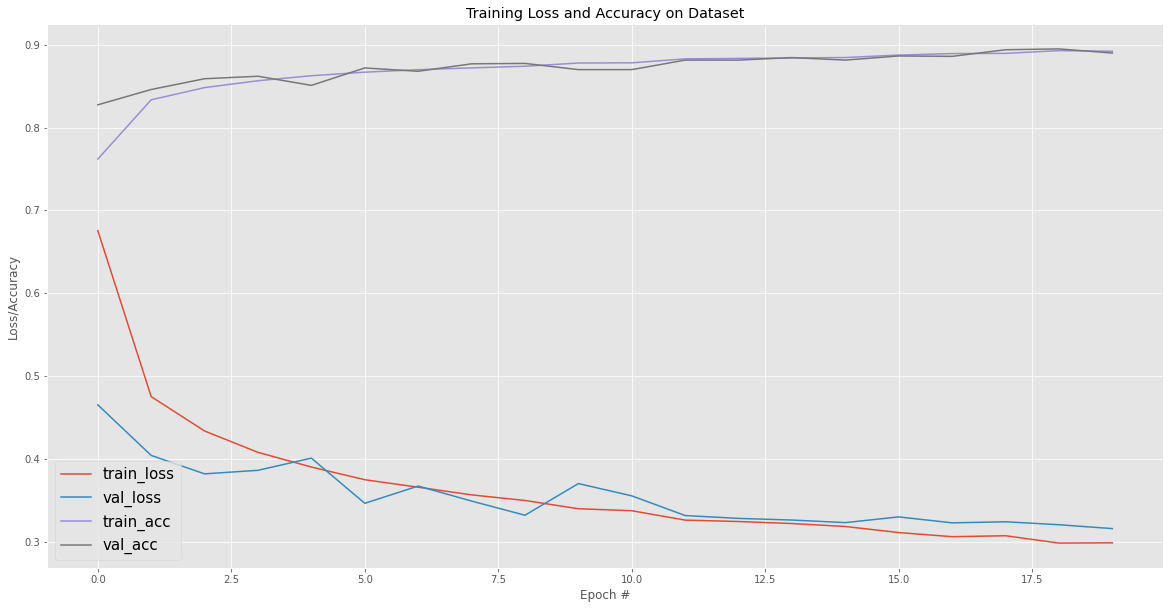

In [0]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left", prop={"size":15})
plt.savefig("plot.png")

## Plot predictions
- plotting 16 predictions with images and labels. Also including confidence of model(%)

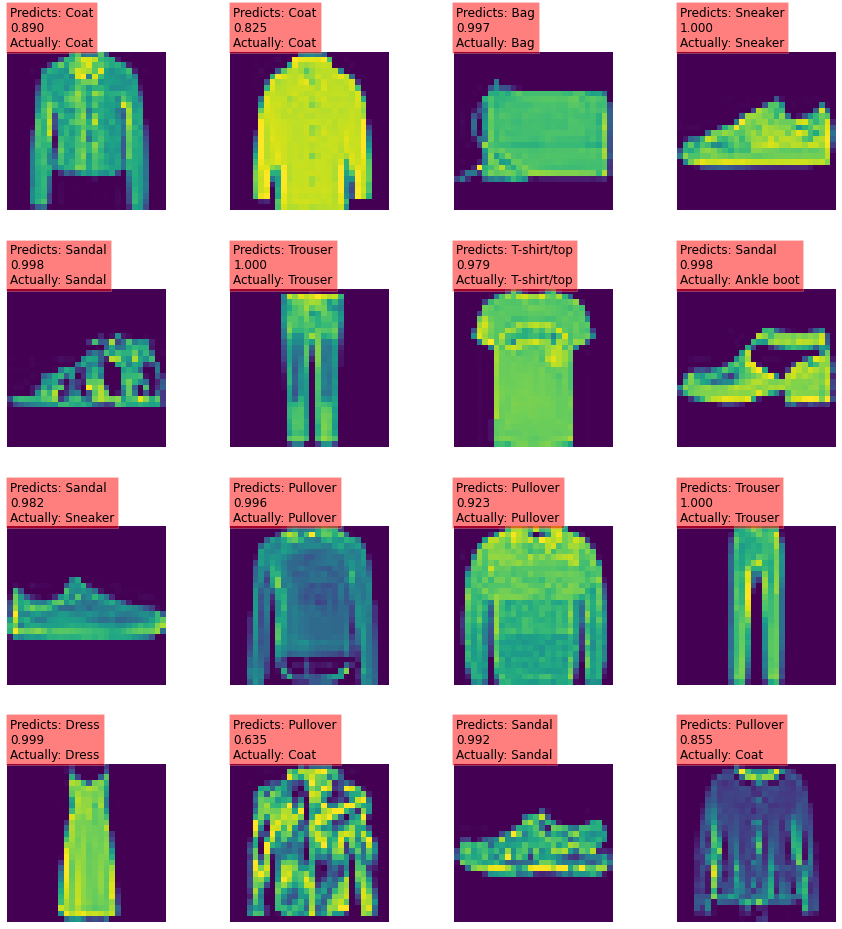

In [0]:
#Needed for predicting because model does not softmax activation on output(Could be added to NN as well)
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

from matplotlib import pyplot
def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')

    actual_label = class_names[y_test[i+10]]

    label = class_names[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0, -1.5,"Predicts: "+ label + '\n%.3f' % +confidence+"\n"+"Actually: "+actual_label, fontsize=12,bbox=dict(facecolor='red', alpha=0.5))
    pyplot.subplots_adjust(wspace=0,hspace=0.5)

  pyplot.gcf().set_size_inches(16, 16)  

plot_predictions(x_test[10:26], 
                 probability_model.predict(x_test[10:26]))